In [1]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
from functions import *
import scib_metrics
%matplotlib inline

/local/data/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/local/data/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  dispatcher = jit(_target='npyufunc',
/local/data/anaconda3/envs/BT/lib/python3.11/site-pac

In [2]:
adata = anndata.read_h5ad(filename="data/adataImmHum4.h5ad")
adata

AnnData object with n_obs × n_vars = 33506 × 4000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [5]:
sdnormalAdata, vaeSD = trainModelBenchmark(adata.copy(), "sdnormal", max_epochs=200,  early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 151/200:  76%|███████▌  | 151/200 [04:26<01:26,  1.77s/it, v_num=1, train_loss_step=1.21e+3, train_loss_epoch=1.43e+3]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1475.084. Signaling Trainer to stop.


In [6]:
mogAdata, vaeMG = trainModelBenchmark(adata.copy(), "mixofgaus", max_epochs=200, early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 138/200:  69%|██████▉   | 138/200 [04:42<02:06,  2.05s/it, v_num=1, train_loss_step=1.46e+3, train_loss_epoch=1.44e+3]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1413.185. Signaling Trainer to stop.


In [7]:
vampAdata, vaeVP = trainModelBenchmark(adata.copy(), "vamp", max_epochs=200, early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [07:35<00:00,  2.21s/it, v_num=1, train_loss_step=1.35e+3, train_loss_epoch=1.43e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [07:35<00:00,  2.28s/it, v_num=1, train_loss_step=1.35e+3, train_loss_epoch=1.43e+3]


In [8]:
flowAdata, vaeNF = trainModelBenchmark(adata.copy(), 'normalflow', max_epochs=100, early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [15:11<00:00,  8.98s/it, v_num=1, train_loss_step=1.33e+3, train_loss_epoch=1.43e+3]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [15:11<00:00,  9.11s/it, v_num=1, train_loss_step=1.33e+3, train_loss_epoch=1.43e+3]


In [9]:
allAdata = adata.copy()
allAdata.obsm["scVISD"] = sdnormalAdata.obsm["scVI"]
allAdata.obsm["scVIMG"] = mogAdata.obsm["scVI"]
allAdata.obsm["scVIVAMP"] = vampAdata.obsm["scVI"]
allAdata.obsm["scVINF"] = flowAdata.obsm["scVI"]

Embeddings:   0%|          | 0/6 [00:00<?, ?it/s]INFO:root:isolated labels: no more than 3 batches per label
INFO:root:CD10+ B cells: 0.411204032599926
INFO:root:Erythrocytes: 0.6199747920036316
INFO:root:Erythroid progenitors: 0.49236167361959815
INFO:root:Monocyte progenitors: 0.4451630264520645
Embeddings:  17%|█▋        | 1/6 [00:50<04:12, 50.46s/it]INFO:root:isolated labels: no more than 3 batches per label
INFO:root:CD10+ B cells: 0.5524995140731335
INFO:root:Erythrocytes: 0.5874729752540588
INFO:root:Erythroid progenitors: 0.6014610305428505
INFO:root:Monocyte progenitors: 0.5329934842884541
Embeddings:  33%|███▎      | 2/6 [07:37<17:19, 259.97s/it]INFO:root:isolated labels: no more than 3 batches per label
INFO:root:CD10+ B cells: 0.5946988984942436
INFO:root:Erythrocytes: 0.5550133362412453
INFO:root:Erythroid progenitors: 0.5793309956789017
INFO:root:Monocyte progenitors: 0.5445068441331387
Embeddings:  50%|█████     | 3/6 [08:18<08:01, 160.34s/it]INFO:root:isolated labels: n

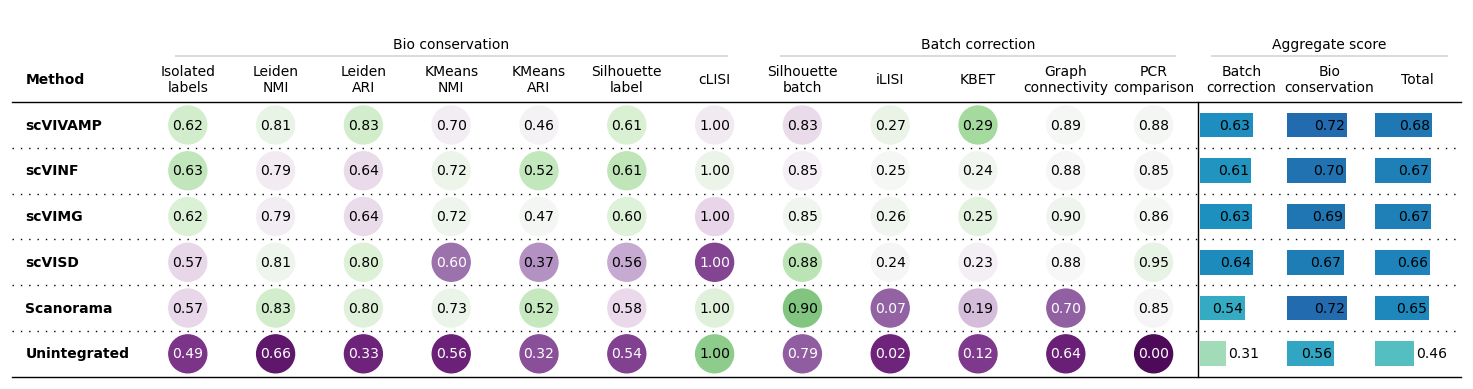

In [14]:
plotBenchmarkResults(allAdata,keys = ["Unintegrated","Scanorama","scVISD","scVIMG","scVIVAMP","scVINF"],label_key="final_annotation")

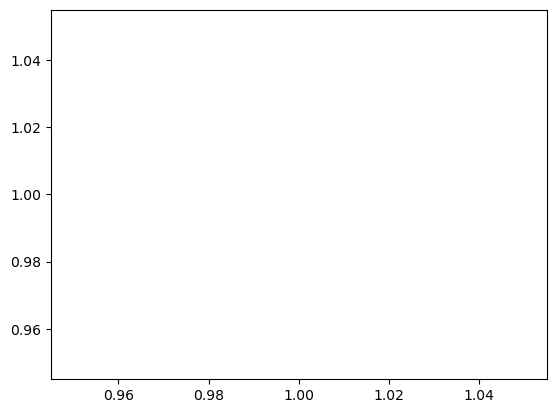

In [2]:
import matplotlib.pyplot as plt
plt.plot([1],[1])